<h2> Approaches for multiple inputs for x 

<h2>imports

In [1]:
import plotly.graph_objects as go
import numpy as np

# import time

# import random
# import scipy.optimize
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<h2> train import

In [2]:
data_df = pd.read_pickle("Kris_updated_yolov8.pkl")

In [3]:
data_df

,image name,car_count,timestamp_true
0,Kris_1206-1423.png,31,2023-06-12 14:23:00
1,Kris_1008-0950.png,32,2023-08-10 09:50:00
2,Kris_1108-0124.png,8,2023-08-11 01:24:00
3,Kris_2406-2128.png,6,2023-06-24 21:28:00
4,Kris_1006-0136.png,7,2023-06-10 01:36:00
...,...,...,...
963,Kris_1206-1252.png,24,2023-06-12 12:52:00
964,Kris_1006-1111.png,12,2023-06-10 11:11:00
965,Kris_0308-0805.png,0,2023-08-03 08:05:00
966,Kris_0806-2233.png,5,2023-06-08 22:33:00


In [63]:
data_df

,car_count,month_name,day,day_of_week,day_of_week_name,hour_of_day,minutes,minute_of_day,sin_minute,cos_minute,sin_hour,cos_hour,color
timestamp_true,,,,,,,,,,,,,
2023-06-06 20:36:00,5,June,6,1,Tuesday,20,36,1236,-0.777146,0.629320,-8.660254e-01,0.500000,"rgba(145,5,74, 0.7)"
2023-06-06 21:06:00,9,June,6,1,Tuesday,21,6,1266,-0.688355,0.725374,-7.071068e-01,0.707107,"rgba(145,5,74, 0.7)"
2023-06-06 21:37:00,4,June,6,1,Tuesday,21,37,1297,-0.584250,0.811574,-7.071068e-01,0.707107,"rgba(145,5,74, 0.7)"
2023-06-06 22:07:00,7,June,6,1,Tuesday,22,7,1327,-0.473320,0.880891,-5.000000e-01,0.866025,"rgba(145,5,74, 0.7)"
2023-06-06 22:37:00,6,June,6,1,Tuesday,22,37,1357,-0.354291,0.935135,-5.000000e-01,0.866025,"rgba(145,5,74, 0.7)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-14 11:26:00,2,August,14,0,Monday,11,26,686,0.147809,-0.989016,2.588190e-01,-0.965926,"rgba(43,41,107, 0.7)"
2023-08-14 11:56:00,2,August,14,0,Monday,11,56,716,0.017452,-0.999848,2.588190e-01,-0.965926,"rgba(43,41,107, 0.7)"
2023-08-14 12:26:00,2,August,14,0,Monday,12,26,746,-0.113203,-0.993572,1.224647e-16,-1.000000,"rgba(43,41,107, 0.7)"


<h2> Feature Engineering

<h3> Cyclic transformation for time

In [5]:
# --> handling index and timestamps first
data_df.reset_index(inplace=True)

data_df.drop(columns=["index","image name"], inplace=True)

data_df["timestamp_true"] = pd.to_datetime(data_df["timestamp_true"]) 

data_df.set_index("timestamp_true", inplace=True)

# # --> type setting for vars
data_df["car_count"] = data_df["car_count"].astype("int")

# # --> deriving features

#data_df["month_no"] = data_df.index.month

data_df["month_name"] = data_df.index.month_name()

data_df["day"] = data_df.index.day

data_df["day_of_week"] = data_df.index.dayofweek

data_df["day_of_week_name"] = data_df.index.day_name()

# data_df["is_weekend"] = np.where(
#     data_df.index.isin(["Sunday", "Saturday"]), 1, 0
# )
# data_df['week_no']=  data_df.index.week

data_df["hour_of_day"] = data_df.index.hour

# # --> Extracting minutes from the timestamp and creating the minute_of_day column
data_df['minutes'] = data_df.index.minute
data_df['minute_of_day'] = data_df['hour_of_day'] * 60 + data_df['minutes']

# data_df.drop(columns=["index","image name"], inplace=True)

# --> Cyclic transformation for minute_of_day , mins elapsed since beginning of the day
data_df['sin_minute'] = np.sin(2 * np.pi * data_df['minute_of_day'] / 1440)
data_df['cos_minute'] = np.cos(2 * np.pi * data_df['minute_of_day'] / 1440)

# --> Cyclic transformation for hour_of_day
data_df['sin_hour'] = np.sin(2 * np.pi * data_df['hour_of_day'] / 24)
data_df['cos_hour'] = np.cos(2 * np.pi * data_df['hour_of_day'] / 24)

# # --> Cyclic transformation for day_of_week
# data_df['sin_day'] = np.sin(2 * np.pi * data_df['day_of_week'] / 7)
# data_df['cos_day'] = np.cos(2 * np.pi * data_df['day_of_week'] / 7)




In [6]:
data_df
# data_df['timestamp_true']

,car_count,month_name,day,day_of_week,day_of_week_name,hour_of_day,minutes,minute_of_day,sin_minute,cos_minute,sin_hour,cos_hour
timestamp_true,,,,,,,,,,,,
2023-06-12 14:23:00,31,June,12,0,Monday,14,23,863,-0.584250,-0.811574,-5.000000e-01,-0.866025
2023-08-10 09:50:00,32,August,10,3,Thursday,9,50,590,0.537300,-0.843391,7.071068e-01,-0.707107
2023-08-11 01:24:00,8,August,11,4,Friday,1,24,84,0.358368,0.933580,2.588190e-01,0.965926
2023-06-24 21:28:00,6,June,24,5,Saturday,21,28,1288,-0.615661,0.788011,-7.071068e-01,0.707107
2023-06-10 01:36:00,7,June,10,5,Saturday,1,36,96,0.406737,0.913545,2.588190e-01,0.965926
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-12 12:52:00,24,June,12,0,Monday,12,52,772,-0.224951,-0.974370,1.224647e-16,-1.000000
2023-06-10 11:11:00,12,June,10,5,Saturday,11,11,671,0.212178,-0.977231,2.588190e-01,-0.965926
2023-08-03 08:05:00,0,August,3,3,Thursday,8,5,485,0.854912,-0.518773,8.660254e-01,-0.500000


In [7]:
data_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 968 entries, 2023-06-12 14:23:00 to 2023-06-07 07:12:00
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_count         968 non-null    int64  
 1   month_name        968 non-null    object 
 2   day               968 non-null    int32  
 3   day_of_week       968 non-null    int32  
 4   day_of_week_name  968 non-null    object 
 5   hour_of_day       968 non-null    int32  
 6   minutes           968 non-null    int32  
 7   minute_of_day     968 non-null    int32  
 8   sin_minute        968 non-null    float64
 9   cos_minute        968 non-null    float64
 10  sin_hour          968 non-null    float64
 11  cos_hour          968 non-null    float64
dtypes: float64(4), int32(5), int64(1), object(2)
memory usage: 79.4+ KB


In [8]:
# Visualization
fig = go.Figure()

# Plot for minute_of_day cyclic transformation
fig.add_trace(go.Scatter(x=data_df['minute_of_day'], y=data_df['sin_minute'], mode='markers', name='sin_minute'))
fig.add_trace(go.Scatter(x=data_df['minute_of_day'], y=data_df['cos_minute'], mode='markers', name='cos_minute'))

fig.update_layout(title='Cyclic Transformation of Minute of Day', xaxis_title='Minute of Day', yaxis_title='Value')


In [9]:
# Visualization
fig = go.Figure()

# Plot for hour_of_day cyclic transformation
fig.add_trace(go.Scatter(x=data_df['hour_of_day'], y=data_df['sin_hour'], mode='markers', name='sin_hour'))
fig.add_trace(go.Scatter(x=data_df['hour_of_day'], y=data_df['cos_hour'], mode='markers', name='cos_hour'))

fig.update_layout(title='Cyclic Transformation of Time Features', xaxis_title='hour_of_day', yaxis_title='Value')
fig.show()

In [62]:
fig = go.Figure()

# Plot for hour_of_day cyclic transformation
fig.add_trace(go.Scatter(x=data_df.index.values, y=data_df['sin_hour'], mode='markers', name='sin_hour'))
fig.add_trace(go.Scatter(x=data_df.index.values, y=data_df['cos_hour'], mode='markers', name='cos_hour'))
fig.add_trace(go.Scatter(x=data_df.index.values, y=data_df['car_count'], mode='markers', name='cos_hour'))

fig.update_layout(title='Cyclic Transformation of Time Features', xaxis_title='hour_of_day', yaxis_title='Value')
fig.show()

In [58]:
data_df[['sin_hour','cos_hour']]

,sin_hour,cos_hour
timestamp_true,,
2023-06-06 20:36:00,-8.660254e-01,0.500000
2023-06-06 21:06:00,-7.071068e-01,0.707107
2023-06-06 21:37:00,-7.071068e-01,0.707107
2023-06-06 22:07:00,-5.000000e-01,0.866025
2023-06-06 22:37:00,-5.000000e-01,0.866025
...,...,...
2023-08-14 11:26:00,2.588190e-01,-0.965926
2023-08-14 11:56:00,2.588190e-01,-0.965926
2023-08-14 12:26:00,1.224647e-16,-1.000000


In [10]:

# Create a scatter plot for the cyclic transformation of time
fig = go.Figure()

# Add data points for the sine and cosine transformations of hour_of_day
fig.add_trace(go.Scatter(x=data_df['sin_hour'], y=data_df['cos_hour'], mode='markers', name='Hour of Day'))

# Add data points for the sine and cosine transformations of minute_of_day
fig.add_trace(go.Scatter(x=data_df['sin_minute'], y=data_df['cos_minute'], mode='markers', name='Minute of Day', marker=dict(size=5, opacity=0.5)))

# Update layout for better visualization
fig.update_layout(title='Cyclic Transformation of Time',
                  xaxis_title='Sine Transformation',
                  yaxis_title='Cosine Transformation',
                  xaxis=dict(range=[-1.1, 1.1]),
                  yaxis=dict(range=[-1.1, 1.1]),
                  width=800,
                  height=800)

# Display the figure
fig.show()


In [11]:

# Create a unique color for each day in the dataset
unique_days = data_df['day'].unique()
colors = {day: f'rgba({np.random.randint(0, 255)},{np.random.randint(0, 255)},{np.random.randint(0, 255)}, 0.7)' for day in unique_days}
data_df['color'] = data_df['day'].map(colors)

# # Create a scatter plot for cyclic transformation of hours
# fig_hour = go.Figure()

# for day, color in colors.items():
#     subset = data_df[data_df['day'] == day]
#     timestamp_str = subset.index.strftime('%d-%m %H:%M')  # Convert DatetimeIndex to the desired string format
#     fig_hour.add_trace(go.Scatter(x=subset['cos_hour'], 
#                                   y=subset['sin_hour'], 
#                                   mode='markers',
#                                   marker=dict(size=5, color=color),
#                                   hovertext=subset.index,
#                                   name=timestamp_str[0]))

# fig_hour.update_layout(title='Cyclic Transformation of Hours',
#                        xaxis_title='Cosine Transformation',
#                        yaxis_title='Sine Transformation',
#                        xaxis=dict(range=[-1.1, 1.1]),
#                        yaxis=dict(range=[-1.1, 1.1]),
#                        width=800,
#                        height=800)

# fig_hour.show()

# Create a scatter plot for cyclic transformation of minutes
fig_minute = go.Figure()

for day, color in colors.items():
    subset = data_df[data_df['day'] == day]
    timestamp_str = subset.index.strftime('%d-%m %H:%M')  # Convert DatetimeIndex to the desired string format
    fig_minute.add_trace(go.Scatter(x=subset['cos_minute'], 
                                    y=subset['sin_minute'], 
                                    mode='markers',
                                    marker=dict(size=5, color=color),
                                    hovertext=subset.index,
                                    name=timestamp_str[0]))

fig_minute.update_layout(title='Cyclic Transformation of Minutes',
                         xaxis_title='Cosine Transformation',
                         yaxis_title='Sine Transformation',
                         xaxis=dict(range=[-1.1, 1.1]),
                         yaxis=dict(range=[-1.1, 1.1]),
                         width=800,
                         height=800)

fig_minute.show()


In [12]:
# Helper functions


def plot_gpr_samples(x, gpr_model, n_samples, ax):
    """Plot samples drawn from the Gaussian process model.

    If the Gaussian process model is not trained then the drawn samples are
    drawn from the prior distribution. Otherwise, the samples are drawn from
    the posterior distribution. Be aware that a sample here corresponds to a
    function.

    Parameters
    ----------
    gpr_model : `GaussianProcessRegressor`
        A :class:`~sklearn.gaussian_process.GaussianProcessRegressor` model.
    n_samples : int
        The number of samples to draw from the Gaussian process distribution.
    ax : matplotlib axis
        The matplotlib axis where to plot the samples.
    """
    # x = np.linspace(0, 5, 100)
    X = x.reshape(-1, 1)

    y_mean, y_std = gpr_model.predict(X, return_std=True)
    y_samples = gpr_model.sample_y(X, n_samples)

    for idx, single_prior in enumerate(y_samples.T):
        ax.plot(
            x,
            single_prior,
            linestyle="--",
            alpha=0.7,
            label=f"Sampled function #{idx + 1}",
        )
    ax.plot(x, y_mean, color="black", label="Mean")
    ax.fill_between(
        x,
        y_mean - y_std,
        y_mean + y_std,
        alpha=0.1,
        color="black",
        label=r"$\pm$ 1 std. dev.",
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_ylim([-3, 3])


def gpr_train(kernel, x_train, y_train, x_test):
    # Create the GPR model
    gpr = GaussianProcessRegressor(kernel=kernel)
    # Fit the GPR model to the training data
    gpr.fit(x_train, y_train)

    # Perform predictions using the trained GPR model
    y_pred, y_std = gpr.predict(x_test, return_std=True)
    # y_pred: Predicted target values
    # y_std: Standard deviation of predictions

    # Access learned model properties
    kernel_params = gpr.kernel_  # Learned kernel parameters
    # noise_level = gpr.kernel_.get_params()['k2_noise_level']  # Estimated noise level (if available)
    noise_level = gpr.alpha_  # Estimated noise level (if available)

    # Print or analyze the results as needed
    print("Predicted values:", y_pred)
    print("Prediction uncertainty (std):", y_std)
    print("Learned kernel parameters:", kernel_params)
    print("Estimated noise level:", noise_level)

    return y_pred, y_std, kernel_params, noise_level, gpr


def plot_gpr_samples_plotly(x, gpr_model, n_samples, X_train, y_train):
    # x = np.linspace(0, 5, 100)
    X = x.reshape(-1, 1)

    y_mean, y_std = gpr_model.predict(X, return_std=True)
    y_samples = gpr_model.sample_y(X, n_samples)

    fig = go.Figure()

    for idx, single_prior in enumerate(y_samples.T):
        fig.add_trace(
            go.Scatter(
                x=x, y=single_prior, mode="lines", name=f"Sampled function #{idx + 1}"
            )
        )

    fig.add_trace(
        go.Scatter(
            x=x,
            y=y_mean,
            mode="lines",
            line_color="red",
            name="Mean",
            line=dict(dash="dash"),
        )
    )

    fig.add_trace(
        go.Scatter(
            x=x,
            y=y_mean - y_std,
            fill=None,
            mode="lines",
            line_color="rgba(255,0,0,0.1)",
            showlegend=False,
        )
    )

    fig.add_trace(
        go.Scatter(
            x=x,
            y=y_mean + y_std,
            fill="tonexty",
            mode="lines",
            line_color="rgba(173, 216, 230, 0.5)",
            name=r"uncertainty",
        )
    )

    fig.add_trace(
        go.Scatter(
            x=X_train.ravel(),
            y=y_train.ravel(),
            mode="markers",
            name="Training Data",
            marker=dict(color="black"),
        )
    )

    fig.update_layout(
        xaxis_title="x",
        yaxis_title="y",
        autosize=True,
    )

    fig.show()


def plot_a_day(data_df, date: int, mode: str):
    day = f"2023-06-{date}"
    day_slice = data_df.loc[day]

    fig = go.Figure()

    fig.add_trace(
        go.Scatter(x=day_slice["hour_of_day"], y=day_slice["Count"], mode=mode)
    )
    fig.update_layout(
        title=f"{day_slice['day'][1]} {day_slice['month_name'][1]}",
        xaxis_title="hour_of_day",
        yaxis_title="Count",
    )

    # Set the range of the x and y axes
    fig.update_xaxes(range=[0, 24])  # assuming hour_of_day is in the range 0-24
    fig.update_yaxes(
        range=[0, max(day_slice["Count"]) * 1.1]
    )  # set y-axis range from 0 to 10% more than the maximum count

    fig.show()


def training_data_plot(
    X_train,
    y_train,
    x_label="X_train_whole",
    y_label="y_train_whole",
    title="Training Data",
    x_lim=[0, 24],
    y_lim=[0, 50],
    figsize=(10, 7),
):
    """
    Plots the training data.

    Parameters:
    - X_train_whole: The X values of the training data.
    - y_train_whole: The y values of the training data.
    - x_label: Label for the X-axis. Default is "X_train_whole".
    - y_label: Label for the Y-axis. Default is "y_train_whole".
    - title: Title of the plot. Default is "Training Data".
    - x_lim: Range for the X-axis. Default is [0, 24].
    - y_lim: Range for the Y-axis. Default is [0, 50].
    - figsize: Size of the figure. Default is (10, 7).
    """

    plt.figure(figsize=figsize)
    plt.scatter(X_train_whole, y_train_whole, color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Set the range of the x and y axes
    plt.xlim(x_lim)
    plt.ylim(y_lim)
    plt.grid(True)

    plt.show()


# gpr trained model
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF


def train_gpr_with_kernel(
    X_train,
    y_train,
    x,
    n_samples,
    length_scale=1.0,
    length_scale_bounds=(1e-05, 1e15),
    random_state=0,
):
    kernel = 1.0 * RBF(
        length_scale=length_scale, length_scale_bounds=length_scale_bounds
    )
    gpr = GaussianProcessRegressor(kernel=kernel, random_state=random_state)

    # plot prior
    plot_gpr_samples_plotly(x, gpr, n_samples, X_train, y_train)

    # plot posterior
    gpr.fit(X_train, y_train)
    plot_gpr_samples_plotly(x, gpr, n_samples, X_train, y_train)

    print(f"Kernel parameters before fit:\n{kernel}")
    print(
        f"Kernel parameters after fit: \n{gpr.kernel_} \n"
        f"Log-likelihood: {gpr.log_marginal_likelihood(gpr.kernel_.theta):.3f}\n"
        f"Loss (NLML): {-gpr.log_marginal_likelihood(gpr.kernel_.theta):.3f}"
    )

    # y_mean, y_cov = gpr.predict(x.reshape(-1, 1), return_cov=True)

    # # Create a heatmap of the covariance matrix
    # heatmap = go.Heatmap(z=y_cov)
    # fig = go.Figure(data=[heatmap])
    # fig.show()

    return gpr

<h4> Cool slider window view of dataset marked with morning,afternoon and evening hours

In [13]:


# # Define colors for different times of the day using RGB values
# time_colors = {
#     'morning': 'rgba(255, 255, 0, 0.8)',   # Yellow
#     'afternoon': 'rgba(255, 165, 0, 0.8)', # Orange
#     'evening': 'rgba(0, 0, 255, 0.8)'      # Blue
# }

# # Create the basic time series plot
# fig = go.Figure()

# # Plotting data for each unique day with a distinct color
# for day in np.unique(data_df.index.date):
#     day_data = data_df[data_df.index.date == day]
    
#     # Adding scatter plot for the data points
#     fig.add_trace(go.Scatter(x=day_data.index,
#                              y=day_data['car_count'],
#                              mode='markers',
#                              name=str(day),
#                              marker=dict(size=2, 
#                                          color='green',
#                                          line=dict(width=1, color='DarkSlateGrey')),
#                              hovertext=[f"{ts.strftime('%d-%m %H:%M')}" for ts in day_data.index]))
    
#     # Adding lines from x-axis to data points with color based on time of day
#     for idx, row in day_data.iterrows():
#         if 6 <= idx.hour < 12:
#             line_color = time_colors['morning']
#         elif 12 <= idx.hour < 17:
#             line_color = time_colors['afternoon']
#         else:
#             line_color = time_colors['evening']
        
#         fig.add_shape(type="line",
#                       x0=idx,
#                       y0=0,
#                       x1=idx,
#                       y1=row['car_count'],
#                       line=dict(color=line_color, width=1))

# # Setting the layout
# fig.update_layout(title='Car Count Over Time',
#                   xaxis_title='Time',
#                   yaxis_title='Car Count',
#                   xaxis_rangeslider_visible=True)

# fig.show()


<H2> Experiment --> Cyclic Transformations

<p> data split

<p> Feature scaling -> Standardization

In [14]:
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Features to consider
features = ['sin_hour', 'cos_hour', 'sin_minute', 'cos_minute', 'day_of_week']
target = 'car_count'

# Assuming data_df is your DataFrame
data_df = data_df.sort_index()  # Ensure the data is sorted by timestamp

data_length = len(data_df)

# Splitting the data into training (70%), validation (15%), and test (15%) sets
train = data_df.iloc[:int(0.7 * data_length)]
valid = data_df.iloc[int(0.7 * data_length):int(0.85 * data_length)]
test = data_df.iloc[int(0.85 * data_length):]

# Extracting the features and target variable for each split
X_train, y_train = train[features], train[target]
X_valid, y_valid = valid[features], valid[target]
X_test, y_test = test[features], test[target]





In [15]:
# Create a line chart to visualize the train-validation-test split using Plotly graph objects
fig = go.Figure()

# Plotting the training data
fig.add_trace(go.Scatter(x=train.index, y=train[target], mode='lines', name='Train Data', line=dict(color='blue')))

# Plotting the validation data
fig.add_trace(go.Scatter(x=valid.index, y=valid[target], mode='lines', name='Validation Data', line=dict(color='green')))

# Plotting the test data
fig.add_trace(go.Scatter(x=test.index, y=test[target], mode='lines', name='Test Data', line=dict(color='red')))

# Setting the layout for the plot
fig.update_layout(title='Train-Validation-Test Split Visualization', xaxis_title='Timestamp', yaxis_title='Count')

# Display the plot
fig.show()

In [16]:

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(train[features])

# Transform the test and validation sets using the fitted scaler
X_test_scaled = scaler.transform(test[features])
X_valid_scaled = scaler.transform(valid[features])


# Scaling the target variable
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_valid_scaled = y_scaler.transform(y_valid.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))


In [17]:
import plotly.graph_objects as go

def plot_scaled_vs_original(original_data, scaled_data, feature_name):
    fig = go.Figure()

    # Original Data
    fig.add_trace(go.Histogram(x=original_data, name='Original', opacity=0.7))
    fig.add_shape(
        go.layout.Shape(type="line", x0=original_data.mean(), x1=original_data.mean(), y0=0, y1=1, yref='paper', line=dict(color="Red")),
    )
    fig.add_shape(
        go.layout.Shape(type="line", x0=original_data.mean() + original_data.std(), x1=original_data.mean() + original_data.std(), y0=0, y1=1, yref='paper', line=dict(color="Green")),
    )
    fig.add_shape(
        go.layout.Shape(type="line", x0=original_data.mean() - original_data.std(), x1=original_data.mean() - original_data.std(), y0=0, y1=1, yref='paper', line=dict(color="Green")),
    )

    # Scaled Data
    fig.add_trace(go.Histogram(x=scaled_data, name='Scaled', opacity=0.7))
    fig.add_shape(
        go.layout.Shape(type="line", x0=scaled_data.mean(), x1=scaled_data.mean(), y0=0, y1=1, yref='paper', line=dict(color="Red", dash="dash")),
    )
    fig.add_shape(
        go.layout.Shape(type="line", x0=scaled_data.mean() + scaled_data.std(), x1=scaled_data.mean() + scaled_data.std(), y0=0, y1=1, yref='paper', line=dict(color="Green", dash="dash")),
    )
    fig.add_shape(
        go.layout.Shape(type="line", x0=scaled_data.mean() - scaled_data.std(), x1=scaled_data.mean() - scaled_data.std(), y0=0, y1=1, yref='paper', line=dict(color="Green", dash="dash")),
    )

    fig.update_layout(title_text=f'Distribution of {feature_name}', barmode='overlay')
    fig.show()

# Plot for features
for feature in features:
    plot_scaled_vs_original(train[feature], X_train_scaled[:, features.index(feature)], feature)

# Plot for target variable
plot_scaled_vs_original(train[target], y_train_scaled.ravel(), target)


In [18]:
# Checking for NaN values in train, validation, and test splits
train_nan_counts = train.isnull().sum()
valid_nan_counts = valid.isnull().sum()
test_nan_counts = test.isnull().sum()

# Displaying the counts of NaN values for each split
print("NaN counts in Train split:\n", train_nan_counts)
print("\nNaN counts in Validation split:\n", valid_nan_counts)
print("\nNaN counts in Test split:\n", test_nan_counts)


NaN counts in Train split:
 car_count           0
month_name          0
day                 0
day_of_week         0
day_of_week_name    0
hour_of_day         0
minutes             0
minute_of_day       0
sin_minute          0
cos_minute          0
sin_hour            0
cos_hour            0
color               0
dtype: int64

NaN counts in Validation split:
 car_count           0
month_name          0
day                 0
day_of_week         0
day_of_week_name    0
hour_of_day         0
minutes             0
minute_of_day       0
sin_minute          0
cos_minute          0
sin_hour            0
cos_hour            0
color               0
dtype: int64

NaN counts in Test split:
 car_count           0
month_name          0
day                 0
day_of_week         0
day_of_week_name    0
hour_of_day         0
minutes             0
minute_of_day       0
sin_minute          0
cos_minute          0
sin_hour            0
cos_hour            0
color               0
dtype: int64


In [19]:
import plotly.figure_factory as ff

# Compute the correlation matrix for numeric columns
corr_matrix = data_df.select_dtypes(include=['float64', 'int64']).corr()

# Darker colors  indicate stronger positive correlations.
# Lighter colors indicate weaker correlations or negative correlations
# remove highly correlated, consider removing 


# Create a heatmap using plotly's figure_factory
fig = ff.create_annotated_heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns.tolist(),
    y=corr_matrix.index.tolist(),
    colorscale='hot',
    showscale=True,
    colorbar_title="Correlation Coefficient"
)

# Update layout for better visualization
fig.update_layout(
    title="Feature Correlation Heatmap",
    xaxis_title="Features",
    yaxis_title="Features"
)

fig.show()


/home/sf_afn/usr_sa/anaconda3/envs/prkng_v2_env/lib/python3.11/importlib/__init__.py:126: UserWarning:

Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).



<h2> Model Training --> Exp 1

In [20]:
#best part of GPR is to include domain knowledge into the model. What are the assumptions we are taking into consideration?
# from visual inspection we detect some local periodicity
# there is surely some kind of noise in the data since it was in essence collected with yolo v8 
# we have max capacity cap for parking area, but is it relevant given we will have dash cam videos to work with?
# day night conditions might be understandable ....



In [21]:
# Exmaple code for 3d viz

# import numpy as np
# import plotly.graph_objects as go
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ExpSineSquared

# # Define the kernels
# periodic_kernel = 1.0 * ExpSineSquared(length_scale=5, periodicity=1.0)
# white_noise_kernel = WhiteKernel(noise_level=1e-5)
# combined_kernel = periodic_kernel + white_noise_kernel

# # Generate a 3D grid of input points
# x = np.linspace(0, 5, 20)
# y = np.linspace(0, 5, 20)
# x, y = np.meshgrid(x, y)
# X_3D = np.vstack((x.ravel(), y.ravel())).T

# def plot_3d_gpr_samples(kernel, n_samples=1):
#     gpr = GaussianProcessRegressor(kernel=kernel)
#     y_samples = gpr.sample_y(X_3D, n_samples)
    
#     fig = go.Figure()
    
#     # Plot the samples from the GP prior as 3D surfaces
#     for sample in y_samples.T:
#         fig.add_trace(go.Surface(z=sample.reshape(x.shape), x=x, y=y, colorscale='Viridis', showscale=False))
    
#     fig.update_layout(
#         title=f"3D Visualization of GP Prior Samples with Kernel: {kernel}",
#         scene=dict(
#             xaxis_title='X1',
#             yaxis_title='X2',
#             zaxis_title='Y'
#         )
#     )
    
#     fig.show()

# # Visualize the GP prior samples for each kernel
# for kernel in [periodic_kernel, white_noise_kernel, combined_kernel]:
#     plot_3d_gpr_samples(kernel)


In [22]:
# 3d plotting stuff will come back later to this fancy stuff

# import numpy as np
# import plotly.graph_objects as go
# from sklearn.gaussian_process import GaussianProcessRegressor

# def plot_gpr_samples_plotly_3d(X1, X2, y_samples, y_mean, y_std, X_train, y_train, features, title=""):
#     """Plot GPR samples in 3D."""
    
#     # Create a 3D figure
#     fig = go.Figure()
    
#     # If mean and std are provided, plot the mean prediction as a primary surface
#     if y_mean is not None and y_std is not None:
#         fig.add_trace(go.Surface(z=y_mean.reshape(X1.shape), 
#                                  x=X1, 
#                                  y=X2, 
#                                  colorscale='Viridis',
#                                  cmin=y_mean.min(),
#                                  cmax=y_mean.max(),
#                                  colorbar=dict(title='Mean'),
#                                  name='Mean'))
    
#     # Overlay the sampled functions as additional surfaces
#     for idx, sample in enumerate(y_samples.T):
#         fig.add_trace(go.Surface(z=sample.reshape(X1.shape), 
#                                  x=X1, 
#                                  y=X2, 
#                                  colorscale='Viridis',
#                                  cmin=sample.min(),
#                                  cmax=sample.max(),
#                                  showscale=False,
#                                  opacity=0.5,
#                                  name=f'Sample {idx+1}'))
    
#     # If training data is provided, plot it as scatter points
#     if X_train is not None and y_train is not None:
#         fig.add_trace(go.Scatter3d(x=X_train[:, 0], 
#                                    y=X_train[:, 1], 
#                                    z=y_train.ravel(),
#                                    mode='markers',
#                                    marker=dict(size=5, color='red', opacity=0.5),
#                                    name='Training Data'))
    
#     # Update layout for better visualization
#     fig.update_layout(scene=dict(aspectmode='cube'), title=title)
    
#     # Show the plot
#     fig.show()


# def train_with_gpr_kernel_3d(X_train, y_train, X_test, kernel, features):
#     # Initialize the GPR model
#     gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

#     # Plot the prior
#     y_samples_prior = gpr.sample_y(X_test, 5)
#     plot_gpr_samples_plotly_3d(X_test, y_samples_prior, None, None, X_train, y_train, features, title="Prior")

#     # Train the GPR model
#     gpr.fit(X_train, y_train)

#     # Predict using the trained model
#     y_mean, y_std = gpr.predict(X_test, return_std=True)
#     y_samples_posterior = gpr.sample_y(X_test, 5)
    
#     # Plot the posterior
#     plot_gpr_samples_plotly_3d(X_test, y_samples_posterior, y_mean, y_std, X_train, y_train, features, title="Posterior")

#     return gpr


In [23]:
# from sklearn.gaussian_process.kernels import RBF

# # Define the RBF kernel
# kernel = 1.0 * RBF(length_scale=1.0)

# # For the first combination of features: sin_hour, cos_hour, day_of_week
# features_1 = ['sin_hour', 'cos_hour', 'day_of_week']
# X_train_1 = X_train[features_1].values  # Convert to numpy array
# X_test_1 = X_test[features_1].values    # Convert to numpy array
# X1, X2 = np.meshgrid(np.linspace(X_test_1[:, 0].min(), X_test_1[:, 0].max(), 100),
#                      np.linspace(X_test_1[:, 1].min(), X_test_1[:, 1].max(), 100))
# X_test_grid = np.c_[X1.ravel(), X2.ravel()]

# gpr_model_1 = train_with_gpr_kernel_3d(X_train_1, y_train, X_test_grid, kernel, features_1)

# # For the second combination of features: sin_minute, cos_minute, day_of_week
# features_2 = ['sin_minute', 'cos_minute', 'day_of_week']
# X_train_2 = X_train[features_2].values  # Convert to numpy array
# X_test_2 = X_test[features_2].values    # Convert to numpy array

# # Create a meshgrid for the two features for the second set:
# X1_2, X2_2 = np.meshgrid(np.linspace(X_test_2[:, 0].min(), X_test_2[:, 0].max(), 100),
#                          np.linspace(X_test_2[:, 1].min(), X_test_2[:, 1].max(), 100))
# X_test_grid_2 = np.c_[X1_2.ravel(), X2_2.ravel()]

# gpr_model_2 = train_with_gpr_kernel_3d(X_train_2, y_train, X_test_grid_2, kernel, features_2)
# # For the second combination of features: sin_minute, cos_minute, day_of_week
# features_2 = ['sin_minute', 'cos_minute', 'day_of_week']
# X_train_2 = X_train[features_2].values  # Convert to numpy array
# X_test_2 = X_test[features_2].values    # Convert to numpy array

# # Create a meshgrid for the two features for the second set:
# X1_2, X2_2 = np.meshgrid(np.linspace(X_test_2[:, 0].min(), X_test_2[:, 0].max(), 100),
#                          np.linspace(X_test_2[:, 1].min(), X_test_2[:, 1].max(), 100))
# X_test_grid_2 = np.c_[X1_2.ravel(), X2_2.ravel()]

# gpr_model_2 = train_with_gpr_kernel_3d(X_train_2, y_train, X_test_grid_2, kernel, features_2)


<p> Kernel defination

In [24]:
from sklearn.gaussian_process.kernels import ExpSineSquared, WhiteKernel, Product

# Define the periodic kernel (ExpSineSquared)
periodic_kernel = ExpSineSquared(length_scale=1.0, periodicity=1.0)

# Define the white noise kernel
white_noise_kernel = WhiteKernel(noise_level=1.0, noise_level_bounds=(1e-10, 5e+2))

# Combine the kernels
combined_kernel = Product(periodic_kernel, white_noise_kernel)


<p> Training bababyyyyy!

In [25]:
from sklearn.gaussian_process import GaussianProcessRegressor

# Initialize the GPR model with the combined kernel
gpr = GaussianProcessRegressor(kernel=combined_kernel, random_state=0)

# Print the kernel before training
print("Kernel before training:\n", gpr.kernel)

# Train the GPR model
gpr.fit(X_train, y_train)

# Print the kernel after training
print("\nKernel after training:\n", gpr.kernel_)

# After training, you can get the optimized kernel parameters:
optimized_kernel = gpr.kernel_

print("Optimized Kernel:", optimized_kernel)



print(
        f"Kernel parameters after fit: \n{gpr.kernel_} \n"
        f"Log-likelihood: {gpr.log_marginal_likelihood(gpr.kernel_.theta):.3f}\n"
        f"Loss (NLML): {-gpr.log_marginal_likelihood(gpr.kernel_.theta):.3f}")

Kernel before training:
 ExpSineSquared(length_scale=1, periodicity=1) * WhiteKernel(noise_level=1)

Kernel after training:
 ExpSineSquared(length_scale=1, periodicity=1) * WhiteKernel(noise_level=292)
Optimized Kernel: ExpSineSquared(length_scale=1, periodicity=1) * WhiteKernel(noise_level=292)
Kernel parameters after fit: 
ExpSineSquared(length_scale=1, periodicity=1) * WhiteKernel(noise_level=292) 
Log-likelihood: -2882.317
Loss (NLML): 2882.317


In [26]:
# Optimized Kernel: ExpSineSquared(length_scale=1, periodicity=1) * WhiteKernel(noise_level=10)
# /home/sf_afn/usr_sa/anaconda3/envs/prkng_v2_env/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning:

# The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.

# Explanation in Simple Terms:

#     Optimized Kernel: This tells you the kernel that the Gaussian Process Regressor (GPR) has determined to be the best fit for your data after training. In this case, it's a combination of the ExpSineSquared kernel (which models periodic functions) and the WhiteKernel (which models noise).

#     ConvergenceWarning: This is a warning message, not an error. It's telling you that during the optimization process, the best value it found for the noise level (noise_level) of the WhiteKernel is very close to the maximum allowed value you set (which is 10.0).

#     What does it mean for our use case? The warning suggests that the model might benefit from a higher noise level than the current upper bound of 10.0. This could mean that the actual noise in your data might be higher than what the current kernel configuration can accommodate.

#     What variables are responsible for this? The variable responsible for this warning is the noise_level parameter of the WhiteKernel. The WhiteKernel represents the noise in the data, and its noise_level parameter quantifies that noise.

#     How to address it? To potentially get a better model fit, you can increase the upper bound of the noise_level parameter and train the model again. This will give the optimization process more flexibility to find a potentially better noise level for your data.

# In summary, the warning is suggesting that you might get a better model fit if you allow for a higher noise level in your kernel configuration. You can address this by adjusting the upper bound of the noise_level parameter and retraining the model.


<p> validation 

In [27]:
y_valid_pred = gpr.predict(X_valid)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_valid, y_valid_pred)
mse = mean_squared_error(y_valid, y_valid_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid, y_valid_pred)

print(f'Mean_absolute_error: {mae}')
print(f'Mean_squared_error: {mse}')
print(f'Rmse: {rmse}')
print(f'R2: {r2}')

print(
        f"Kernel parameters after fit: \n{gpr.kernel_} \n"
        f"Log-likelihood: {gpr.log_marginal_likelihood(gpr.kernel_.theta):.3f}\n"
        f"Loss (NLML): {-gpr.log_marginal_likelihood(gpr.kernel_.theta):.3f}")

Mean_absolute_error: 13.524137931034483
Mean_squared_error: 321.8551724137931
Rmse: 17.94032252814294
R2: -1.3162902826097969
Kernel parameters after fit: 
ExpSineSquared(length_scale=1, periodicity=1) * WhiteKernel(noise_level=292) 
Log-likelihood: -2882.317
Loss (NLML): 2882.317


In [28]:
residuals = y_valid - y_valid_pred

fig = go.Figure()
fig.add_trace(go.Scatter(x=y_valid_pred, y=residuals, mode='markers', name='Residuals'))
fig.update_layout(title='Residual Plot', xaxis_title='Predicted Values', yaxis_title='Residuals')
fig.add_shape(type="line", x0=min(y_valid_pred), y0=0, x1=max(y_valid_pred), y1=0, line=dict(color="Red",width=2))
fig.show()

In [29]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import r2_score

# Predictions on the validation set
y_pred = gpr.predict(X_valid)

# Residuals
residuals = y_valid - y_pred

# R-squared value
r2 = r2_score(y_valid, y_pred)

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Predicted vs Actual", f"Residual Plot (R^2: {r2:.2f})"))

# Predicted vs Actual plot
fig.add_trace(
    go.Scatter(x=y_valid, y=y_pred, mode='markers', name='Predicted vs Actual'),
    row=1, col=1
)

# Line of best fit for Predicted vs Actual
fig.add_trace(
    go.Scatter(x=y_valid, y=y_valid, mode='lines', name='Line of Best Fit', line=dict(color='red')),
    row=1, col=1
)

# Residual plot
fig.add_trace(
    go.Scatter(x=y_valid, y=residuals, mode='markers', name='Residuals'),
    row=1, col=2
)

# Horizontal line at y=0 for Residual plot
fig.add_trace(
    go.Scatter(x=y_valid, y=[0]*len(y_valid), mode='lines', name='Zero Line', line=dict(color='red')),
    row=1, col=2
)

# Update layout with axis labels
fig.update_layout(title="Model Evaluation Plots", showlegend=False)
fig.update_xaxes(title_text="Actual Values", row=1, col=1)
fig.update_yaxes(title_text="Predicted Values", row=1, col=1)
fig.update_xaxes(title_text="Actual Values", row=1, col=2)
fig.update_yaxes(title_text="Residuals", row=1, col=2)

fig.show()


In [30]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring="neg_mean_squared_error", train_sizes=np.linspace(0.1, 1.0, 5))
    
    train_scores_mean = np.mean(-train_scores, axis=1)
    train_scores_std = np.std(-train_scores, axis=1)
    test_scores_mean = np.mean(-test_scores, axis=1)
    test_scores_std = np.std(-test_scores, axis=1)
    
    fig = go.Figure()
    
    # Training scores
    fig.add_trace(go.Scatter(x=train_sizes, y=train_scores_mean, mode='lines', name='Training score', line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=train_sizes, y=train_scores_mean + train_scores_std, mode='lines', line=dict(color='blue', dash='dash')))
    fig.add_trace(go.Scatter(x=train_sizes, y=train_scores_mean - train_scores_std, mode='lines', line=dict(color='blue', dash='dash')))
    
    # Cross-validation scores
    fig.add_trace(go.Scatter(x=train_sizes, y=test_scores_mean, mode='lines', name='Cross-validation score', line=dict(color='orange')))
    fig.add_trace(go.Scatter(x=train_sizes, y=test_scores_mean + test_scores_std, mode='lines', line=dict(color='orange', dash='dash')))
    fig.add_trace(go.Scatter(x=train_sizes, y=test_scores_mean - test_scores_std, mode='lines', line=dict(color='orange', dash='dash')))
    
    fig.update_layout(title=title, xaxis_title='Training examples', yaxis_title='MSE', yaxis=dict(autorange='reversed'))
    fig.show()

plot_learning_curve(gpr, X_train, y_train, title="Learning Curve for Gaussian Process Regressor")


<Axes: xlabel='timestamp_true'>

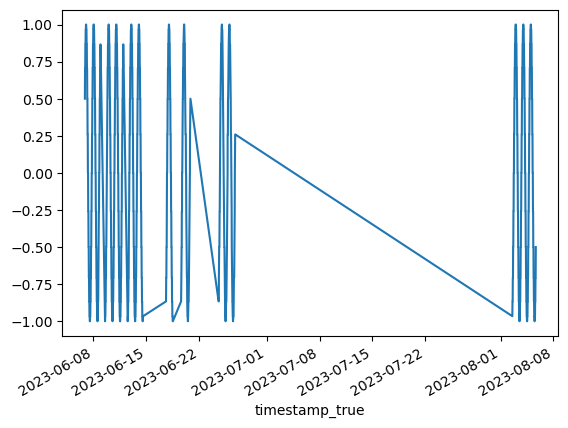

In [53]:
X_train['cos_hour']

In [39]:
y_train

timestamp_true
2023-06-06 20:36:00    5
2023-06-06 21:06:00    9
2023-06-06 21:37:00    4
2023-06-06 22:07:00    7
2023-06-06 22:37:00    6
                      ..
2023-08-05 14:12:00    8
2023-08-05 14:43:00    2
2023-08-05 15:13:00    4
2023-08-05 15:43:00    2
2023-08-05 16:13:00    0
Name: car_count, Length: 677, dtype: int64

In [31]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1.0 * RBF(length_scale=1, length_scale_bounds=(1e-1, 50), max_iter)

# <p> Training bababyyyyy!
from sklearn.gaussian_process import GaussianProcessRegressor

# Initialize the GPR model with the combined kernel
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

# Print the kernel before training
print("Kernel before training:\n", gpr.kernel)

# Train the GPR model
gpr.fit(X_train, y_train)

# Print the kernel after training
print("\nKernel after training:\n", gpr.kernel_)

# After training, you can get the optimized kernel parameters:
optimized_kernel = gpr.kernel_

print("Optimized Kernel:", optimized_kernel)



print(
        f"Kernel parameters after fit: \n{gpr.kernel_} \n"
        f"Log-likelihood: {gpr.log_marginal_likelihood(gpr.kernel_.theta):.3f}\n"
        f"Loss (NLML): {-gpr.log_marginal_likelihood(gpr.kernel_.theta):.3f}")

# <p> validation 
y_valid_pred = gpr.predict(X_valid)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_valid, y_valid_pred)
mse = mean_squared_error(y_valid, y_valid_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid, y_valid_pred)

print(f'Mean_absolute_error: {mae}')
print(f'Mean_squared_error: {mse}')
print(f'Rmse: {rmse}')
print(f'R2: {r2}')

print(
        f"Kernel parameters after fit: \n{gpr.kernel_} \n"
        f"Log-likelihood: {gpr.log_marginal_likelihood(gpr.kernel_.theta):.3f}\n"
        f"Loss (NLML): {-gpr.log_marginal_likelihood(gpr.kernel_.theta):.3f}")
residuals = y_valid - y_valid_pred

fig = go.Figure()
fig.add_trace(go.Scatter(x=y_valid_pred, y=residuals, mode='markers', name='Residuals'))
fig.update_layout(title='Residual Plot', xaxis_title='Predicted Values', yaxis_title='Residuals')
fig.add_shape(type="line", x0=min(y_valid_pred), y0=0, x1=max(y_valid_pred), y1=0, line=dict(color="Red",width=2))
fig.show()


# Predictions on the validation set
y_pred = gpr.predict(X_valid)

# Residuals
residuals = y_valid - y_pred

# R-squared value
r2 = r2_score(y_valid, y_pred)

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Predicted vs Actual", f"Residual Plot (R^2: {r2:.2f})"))

# Predicted vs Actual plot
fig.add_trace(
    go.Scatter(x=y_valid, y=y_pred, mode='markers', name='Predicted vs Actual'),
    row=1, col=1
)

# Line of best fit for Predicted vs Actual
fig.add_trace(
    go.Scatter(x=y_valid, y=y_valid, mode='lines', name='Line of Best Fit', line=dict(color='red')),
    row=1, col=1
)

# Residual plot
fig.add_trace(
    go.Scatter(x=y_valid, y=residuals, mode='markers', name='Residuals'),
    row=1, col=2
)

# Horizontal line at y=0 for Residual plot
fig.add_trace(
    go.Scatter(x=y_valid, y=[0]*len(y_valid), mode='lines', name='Zero Line', line=dict(color='red')),
    row=1, col=2
)

# Update layout with axis labels
fig.update_layout(title="Model Evaluation Plots", showlegend=False)
fig.update_xaxes(title_text="Actual Values", row=1, col=1)
fig.update_yaxes(title_text="Predicted Values", row=1, col=1)
fig.update_xaxes(title_text="Actual Values", row=1, col=2)
fig.update_yaxes(title_text="Residuals", row=1, col=2)

fig.show()

from sklearn.model_selection import learning_curve



plot_learning_curve(gpr, X_train, y_train, title="Learning Curve for Gaussian Process Regressor")



Kernel before training:
 1**2 * RBF(length_scale=1)



Kernel after training:
 284**2 * RBF(length_scale=0.102)
Optimized Kernel: 284**2 * RBF(length_scale=0.102)
Kernel parameters after fit: 
284**2 * RBF(length_scale=0.102) 
Log-likelihood: -6458503984980.907
Loss (NLML): 6458503984980.907
Mean_absolute_error: 73.61530026430137
Mean_squared_error: 272257.8311030972
Rmse: 521.7833181533281
R2: -1958.3538417265395
Kernel parameters after fit: 
284**2 * RBF(length_scale=0.102) 
Log-likelihood: -6458503984980.907
Loss (NLML): 6458503984980.907


/home/sf_afn/usr_sa/anaconda3/envs/prkng_v2_env/lib/python3.11/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



/home/sf_afn/usr_sa/anaconda3/envs/prkng_v2_env/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning:

The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.

/home/sf_afn/usr_sa/anaconda3/envs/prkng_v2_env/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning:

The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.

/home/sf_afn/usr_sa/anaconda3/envs/prkng_v2_env/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning:

The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.

/home/sf_afn/usr_sa/anaconda3/

In [42]:
kernel

1**2 * RBF(length_scale=1)

In [43]:
gpr

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1), random_state=0)

In [50]:
X_test.values.reshape(-1,1)

(730, 1)